# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['Outcome'].unique()

array([1, 0])

# Data Cleaning

<AxesSubplot:>

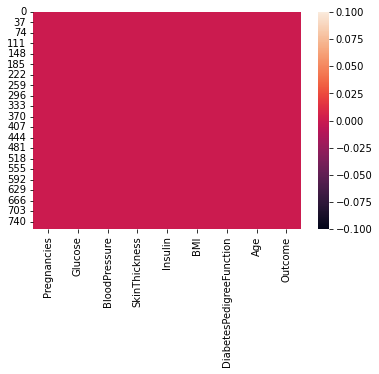

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI']].replace(0, np.nan)

<AxesSubplot:>

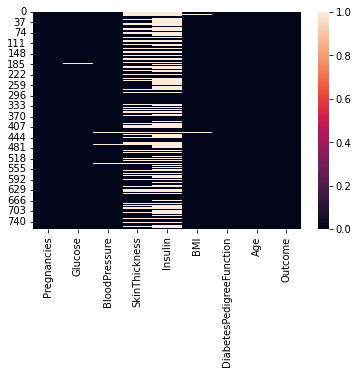

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

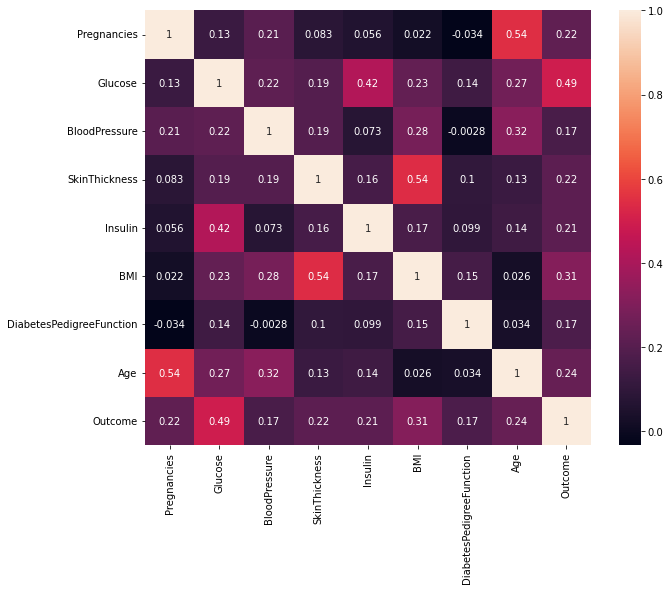

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [15]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

In [16]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(7)

In [21]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       166
           1       0.63      0.59      0.61        88

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
ks = list(range(1, 100, 2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [26]:
scores = []

for k in ks:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy').mean()
    scores.append(score)
    print(f"Accuracy with {k} neighbours: {score}")

Accuracy with 1 neighbours: 0.6784059078176725
Accuracy with 3 neighbours: 0.7201341142517613
Accuracy with 5 neighbours: 0.7396400984636278
Accuracy with 7 neighbours: 0.7526695526695526
Accuracy with 9 neighbours: 0.7565486800780918
Accuracy with 11 neighbours: 0.7604872251931075
Accuracy with 13 neighbours: 0.7565571683218743
Accuracy with 15 neighbours: 0.7630846277905101
Accuracy with 17 neighbours: 0.7630761395467278
Accuracy with 19 neighbours: 0.7708768355827178
Accuracy with 21 neighbours: 0.7682964094728799
Accuracy with 23 neighbours: 0.7643918173329938
Accuracy with 25 neighbours: 0.7617774382480265
Accuracy with 27 neighbours: 0.7644003055767762
Accuracy with 29 neighbours: 0.7669977081741788
Accuracy with 31 neighbours: 0.7617859264918089
Accuracy with 33 neighbours: 0.7656735421441304
Accuracy with 35 neighbours: 0.7604787369493252
Accuracy with 37 neighbours: 0.7605042016806722
Accuracy with 39 neighbours: 0.7644003055767762
Accuracy with 41 neighbours: 0.76441728206434

In [27]:
scores.index(max(scores))

9

In [28]:
ks[9]

19

In [29]:
knn = KNeighborsClassifier(19)

In [30]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [31]:
import pickle

In [32]:
pickle.dump(knn, open('KNN Model.pkl', 'wb'))

In [33]:
model = pickle.load(open('KNN Model.pkl', 'rb'))

In [34]:
X.columns

Index(['Glucose', 'BMI', 'Age'], dtype='object')

In [35]:
model.predict([[100, 25, 35]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
probability = model.predict_proba([[100, 25, 35]])
probability

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.84210526, 0.15789474]])

In [37]:
probability = np.round((np.max(probability) * 100), 2)
probability

84.21

In [38]:
type(probability)

numpy.float64